# Classifying Mr. Beast YouTube Videos

In this project, we will classify Mr. Beast's YouTube videos into specific categories based on their content. The categories we will use are:
- **Giving out cash**
- **Vs Challeges**
- **Challenges**
- **Survival**
- **Experiments** (for videos that involve extreme scenarios, like "I Didn’t Eat Food For 30 Days")
- **Giveaways** (for videos specifically about gifting or giving away items, like "I Built 100 Houses And Gave Them Away!")
- **Contests** (for videos that involve competition without monetary rewards)
- **Other** (for videos that don’t fit into the above categories)

## Data Loading
Let's start by loading the data from the CSV file.

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('mrbeast_videos1.csv')

# Display the first few rows of the dataframe
df.head()


,Title,Description,Likes,Comments,Views,URL,Length
0,7 Days Exploring An Underground City,This salt mine is the coolest underground city...,2561697,24777,74099527,https://www.youtube.com/watch?v=bn0Kh9c4Zv4,0:20:35
1,"Men Vs Women Survive The Wilderness For $500,000",Some of these strategies were wild!\nWet thing...,3587387,48047,119064843,https://www.youtube.com/watch?v=aRcUVhVlSHg,0:31:47
2,7 Days Stranded In A Cave,I didn’t think surviving in a cave would be th...,4231120,96130,122136852,https://www.youtube.com/watch?v=ndAQfTzlVjc,0:17:58
3,"Survive 100 Days In Nuclear Bunker, Win $500,000","This video was really fun to make, I hope you ...",5361910,85548,200366321,https://www.youtube.com/watch?v=UPrkC1LdlLY,0:32:20
4,"50 YouTubers Fight For $1,000,000",I can’t believe how intense this video got\nTh...,8771975,350874,260992579,https://www.youtube.com/watch?v=4SNThp0YiU4,0:41:27


## Data Exploration
Now, let's explore the dataset to understand its structure and contents.


In [2]:
# Display the shape and columns of the dataframe
df.shape, df.columns

((68, 7),
 Index(['Title', 'Description', 'Likes', 'Comments', 'Views', 'URL', 'Length'], dtype='object'))

## Data Preprocessing
We will need to preprocess the data, particularly the 'Title' and 'Description' columns, to prepare them for classification. This may involve text cleaning, tokenization and more.

Let's define a function to clean the text.


In [3]:
import re

def clean_text(text):
    """Clean the input text by removing special characters and extra spaces."""
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()    # Remove extra spaces
    return text

# Apply the cleaning function to the Title and Description
df['Cleaned_Title'] = df['Title'].apply(clean_text)
df['Cleaned_Description'] = df['Description'].apply(clean_text)

# Display the cleaned data
df[['Cleaned_Title', 'Cleaned_Description']].head()


,Cleaned_Title,Cleaned_Description
0,7 Days Exploring An Underground City,This salt mine is the coolest underground city...
1,Men Vs Women Survive The Wilderness For 500000,Some of these strategies were wild Wet things ...
2,7 Days Stranded In A Cave,I didnt think surviving in a cave would be tha...
3,Survive 100 Days In Nuclear Bunker Win 500000,This video was really fun to make I hope you e...
4,50 YouTubers Fight For 1000000,I cant believe how intense this video got The ...


## Classification Logic
We will classify the videos based on keywords in the cleaned titles and descriptions. Let's define a function to classify the videos.


In [27]:
def classify_video(title, description):
    """Classify the video based on title and description."""
    title = title.lower()
    description = description.lower()

    # Check for "vs" scenarios
    if 'vs' in title or 'vs' in description:
        return 'Vs Challenge'
    
    # Keyword-based classification for cash giveaways
    if any(keyword in title or keyword in description for keyword in [
        'cash', 'win money', 'cash prize', 'giveaway', 'contest', 'prize money', '$']):
        return 'Giving Out Cash'
    
    elif any(keyword in title or keyword in description for keyword in [
        'challenge', 'challenges', 'extreme hide and seek', 'last to leave', 'last to stop', 'protect']):
        return 'Challenges'
    
    # Survival classification
    elif any(keyword in title or keyword in description for keyword in [
        'survive', 'survival', 'stranded', 'day', 'days', 'hours']):
        return 'Survival'
    
    elif any(keyword in title or keyword in description for keyword in [
        'built', 'made', 'experiment', 'test']):
        return 'Experiments'
    
    elif 'giveaway' in title or 'giveaway' in description:
        return 'Giveaways'
    
    elif 'contest' in title or 'competition' in description:
        return 'Contests'
    
    else:
        return 'Other'

# Apply the classification function
df['Category'] = df.apply(lambda row: classify_video(row['Cleaned_Title'], row['Cleaned_Description']), axis=1)

# Display the categorized data
df[['Title', 'Category']].head()


,Title,Category
0,7 Days Exploring An Underground City,Survival
1,"Men Vs Women Survive The Wilderness For $500,000",Vs Challenge
2,7 Days Stranded In A Cave,Survival
3,"Survive 100 Days In Nuclear Bunker, Win $500,000",Challenges
4,"50 YouTubers Fight For $1,000,000",Other


## Results
Let's look at the distribution of the categories.

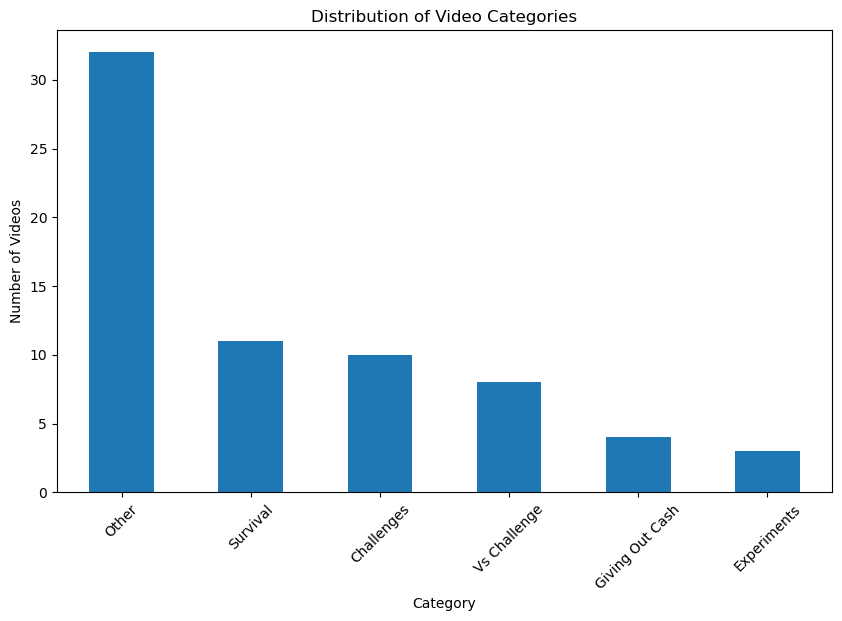

In [28]:
# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Video Categories')
plt.xlabel('Category')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()


## Text Classification
Next, we will preprocess video titles and descriptions and use a text classification model to categorize videos into the defined categories.

### Data Preprocessing for Text Classification

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Splitting the data into training and testing sets
X = df['Cleaned_Title'] + " " + df['Cleaned_Description']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizing the text data
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


### Training the classifier

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Training the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Making predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

# Evaluating the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.36
                 precision    recall  f1-score   support

     Challenges       0.00      0.00      0.00         1
    Experiments       0.00      0.00      0.00         2
Giving Out Cash       0.00      0.00      0.00         1
          Other       0.36      1.00      0.53         5
       Survival       0.00      0.00      0.00         3
   Vs Challenge       0.00      0.00      0.00         2

       accuracy                           0.36        14
      macro avg       0.06      0.17      0.09        14
   weighted avg       0.13      0.36      0.19        14



C:\Users\Hp ProBook\anaconda3\envs\learn-env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp ProBook\anaconda3\envs\learn-env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp ProBook\anaconda3\envs\learn-env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

## Performance Analysis
We will analyze how videos perform in each category by comparing view counts, like counts and comment counts. We'll calculate averages or use statistical tests to determine if certain categories perform better than others.

### Performance Analysis Code

In [33]:
# Grouping by category and calculating average metrics
performance_analysis = df.groupby('Category').agg({
    'Views': 'mean',
    'Likes': 'mean',
    'Comments': 'mean'
}).reset_index()

# Display the performance analysis
print(performance_analysis)


          Category         Views         Likes       Comments
0       Challenges  1.397884e+08  3.364834e+06   83152.100000
1      Experiments  1.415146e+08  6.809355e+06  225785.333333
2  Giving Out Cash  1.617907e+08  4.070540e+06  141808.750000
3            Other  2.042618e+08  4.781929e+06  158733.750000
4         Survival  1.862104e+08  4.455329e+06  111655.909091
5     Vs Challenge  2.415171e+08  5.134792e+06  103430.000000


## Visualization
Create visualizations to illustrate the distribution of videos across categories and average view/like/comment counts per category.


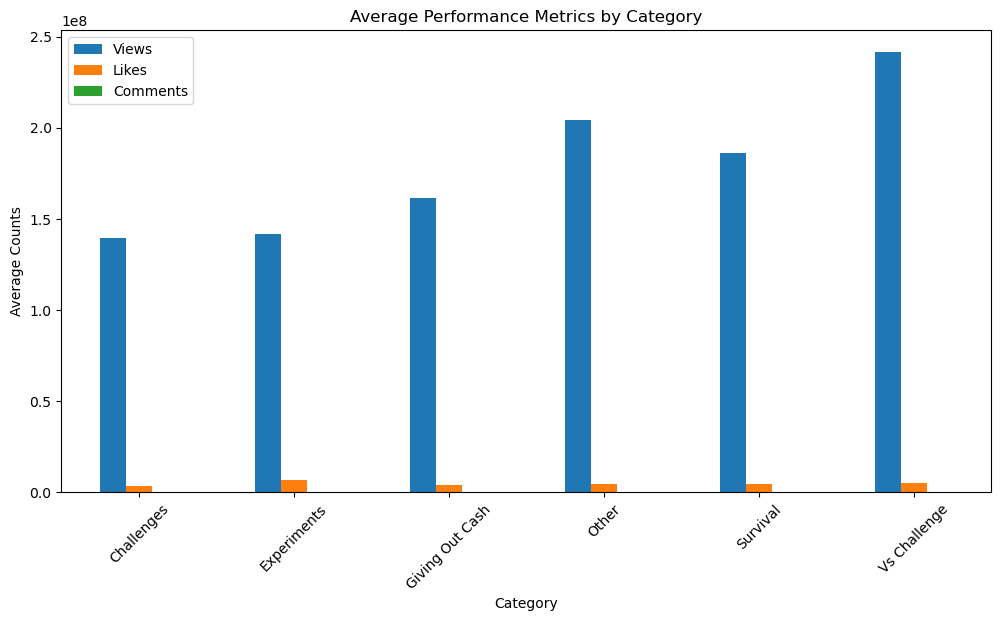

In [34]:
# Plotting the performance analysis
performance_analysis.plot(x='Category', kind='bar', figsize=(12, 6))
plt.title('Average Performance Metrics by Category')
plt.ylabel('Average Counts')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()


# Findings and Conclusions

**Category Distribution:**

* The `Other` category dominates the classification, indicating a broad range of content that doesn't fit neatly into specific categories.
* Following `Other,` the `Survival` and `Challenges` categories also have a significant presence, showcasing Mr. Beast's appeal in these popular formats.

**View Count Performance:**

* `Vs Challenge` videos have the highest average view counts, suggesting strong viewer interest and engagement in competitive formats.
* The `Other` category ranks second in terms of views, indicating diverse content that attracts attention.
* Survival videos also perform well, coming in third place in average views, highlighting audience interest in survival scenarios.
* Categories like `Giving Out Cash,` `Experiments,` and `Challenges` maintain solid view counts, demonstrating their effectiveness in drawing viewers.

**Overall Performance Analysis:**

* All categories show a healthy level of performance in terms of views, indicating that Mr. Beast's content strategy effectively engages a wide audience across multiple themes.
* Despite high view counts, engagement metrics such as likes and comments are relatively low across all categories, suggesting that while viewers are watching, they may not be as inclined to interact with the content.

**Engagement Insights:**

* The low levels of likes and comments across all categories may indicate that viewers prefer passive consumption rather than active engagement with the content.
* This trend could suggest that Mr. Beast's videos are entertaining enough to attract views but may not encourage further interaction from the audience.

**Trends and Recommendations:**

* Based on the strong performance of `Vs Challenges` and `Survival` videos, it may be beneficial for Mr. Beast to produce more content in these categories to capitalize on viewer interest.
* Exploring ways to enhance audience interaction, such as incorporating more engaging call-to-action prompts or interactive elements in videos, could potentially improve likes and comments.

**General Takeaways:**

* Mr. Beast's diverse content strategy, evidenced by the dominance of the `Other` category, allows for experimentation and adaptation to audience preferences.
* The findings suggest a need for ongoing analysis of audience engagement metrics to better understand viewer behavior and refine content strategies.

**Future Content Strategy:**

* Focus on creating more `Vs Challenge` and `Survival` videos to leverage their popularity.
* Experiment with formats that encourage viewer interaction to boost engagement metrics like likes and comments.
* Continue to monitor trends over time to adapt content strategies based on evolving viewer interests and engagement patterns.